In [1]:
pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def intensity_corona(years):

    L_OS = []
    L_AS = []
    R_OS = []
    R_AS = []
   

    for year in years:

        spits = pd.read_excel(f"/Users/Gijs/Documents/GitHub/TIL6010-LabAssignments/datasets_spitsuren_wegvakken/INWEVA_{year}_spits.xlsx", usecols=['VIAS_baannr', 'Lengte_baan_meter', 'Baantype_van', 'Ri_van', 'Wegnr_van', 'Hm_van' , 'Ri_naar', 'Baantype_naar', 'Hm_naar', 'Wegnr_naar', 'OS_AL', 'AS_AL'])

        filter_spits = spits[(spits['Wegnr_van'] == 4) & (spits['Wegnr_naar'] == 4) & (spits['Baantype_van'] == 'HR') & (spits['Baantype_naar'] == 'HR')]
        filter_spits_HM = filter_spits[(filter_spits['Hm_van'] <= 150000) & (filter_spits['Hm_naar'] <= 150000)]

        filtered_L = filter_spits_HM[(filter_spits_HM['Ri_van'] == 'L') & (filter_spits_HM['Ri_naar'] == 'L')]
        final_L = filtered_L.sort_values(by='Hm_van', ascending=True)

        filtered_R = filter_spits_HM[(filter_spits_HM['Ri_van'] == 'R') & (filter_spits_HM['Ri_naar'] == 'R')]
        final_R = filtered_R.sort_values(by='Hm_van', ascending=True)

        mean_L_OS = final_L['OS_AL'].mean()
        mean_L_AS = final_L['AS_AL'].mean()
        L_OS.append(round(mean_L_OS))
        L_AS.append(round(mean_L_AS))
        # print(f'The mean intensity on the right side of the A4 is {mean_L_OS:.0f} vehicles during the morning rush hour ')
        # print(f'The mean intensity on the right side of the A4 is {mean_L_AS:.0f} vehicles during the afternoon rush hour') 

        mean_R_OS = final_R['OS_AL'].mean()
        mean_R_AS = final_R['AS_AL'].mean()
        R_OS.append(round(mean_R_OS))
        R_AS.append(round(mean_R_AS))
        # print(f'The mean intensity on the left side of the A4 is {mean_R_OS:.0f} vehicles during the morning rush hour ')
        # print(f'The mean intensity on the left side of the A4 is {mean_R_AS:.0f} vehicles during the afternoon rush hour')

    df_results = pd.DataFrame({
        'Year': years,
        'Mean_MRH_L': L_OS,
        'Mean_ARH_L': L_AS,
        'Mean_MRH_R': R_OS,
        'Mean_ARH_R': R_AS
    })

    print(df_results)

    plt.figure(figsize=(17, 11))

    plt.subplot(2, 2, 1)
    plt.plot(years, R_OS, color="xkcd:steel blue", label='Morning Rush R', marker='o')
    plt.plot(years, L_OS, color='xkcd:dark sea green', label='Morning Rush L', marker='o')
    plt.plot(years, R_AS, color='xkcd:orange red', label='Afternoon Rush R', marker='o')
    plt.plot(years, L_AS, color='xkcd:orchid', label='Afternoon Rush L', marker='o')
    plt.grid()
    plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour intensity on A4')
    plt.xlabel('Year')
    plt.ylabel('Intensity [vehicles]')
    plt.legend(loc='upper left')
    plt.ylim(6500, 10500)
    plt.xlim(2019.5, 2023.5)
    plt.xticks(years)

   Year  Mean_MRH_L  Mean_ARH_L  Mean_MRH_R  Mean_ARH_R
0  2020        8365        8134        7020        8654
1  2021        9003        8625        7535        9078
2  2022       10061        9066        8310        9220
3  2023       10026        9025        8472        9168


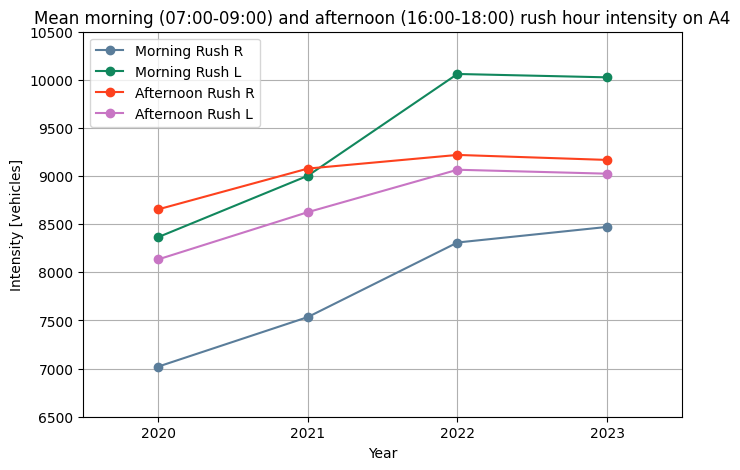

In [6]:
years = [2020, 2021, 2022, 2023]
intensity_corona(years)